In [1]:
import sys,os,os.path
sys.path.append("../../") # if you move files around, you need to adjust this!
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'


import random
import tables as tb
import numpy  as np
import pandas as pd
import invisible_cities.io.mcinfo_io as mcio

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from matplotlib.legend_handler import HandlerPatch

### Import track information

In [2]:
path_5 = 'nexus_5bar_208Tl.h5'
path_13 = 'nexus_13.5bar_208Tl.h5'

In [3]:
# load hits
dfMC_5 = mcio.load_mchits_df(path_5).reset_index()
eventsMC_5 = np.unique(dfMC_5.event_id.to_numpy())

dfMC_13 = mcio.load_mchits_df(path_13).reset_index()
eventsMC_13 = np.unique(dfMC_13.event_id.to_numpy())

# load particles
dfP_5 = mcio.load_mcparticles_dfnew(path_5).reset_index()
dfP_13 = mcio.load_mcparticles_dfnew(path_13).reset_index()

In [4]:
display(dfMC_5)
display(dfMC_13)

,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,1980000,27,0,-119.168808,-132.885818,770.475525,2.587712,0.000082,ACTIVE
1,1980000,31,0,-119.168800,-132.885803,770.475464,2.587733,0.000021,ACTIVE
2,1980000,30,0,-119.168839,-132.885788,770.475647,2.587749,0.000035,ACTIVE
3,1980000,29,0,-119.168320,-132.885788,770.476196,2.587772,0.000553,ACTIVE
4,1980000,28,0,-119.763306,-133.685059,770.561523,2.591117,0.003606,ACTIVE
...,...,...,...,...,...,...,...,...,...
103626,1980135,52,7,395.129303,259.682526,593.042542,0.560777,0.000842,ACTIVE
103627,1980135,52,8,395.138519,259.675354,593.050598,0.561070,0.002152,ACTIVE
103628,1980135,52,9,395.146240,259.675537,593.053528,0.561277,0.002071,ACTIVE
103629,1980135,52,10,395.143738,259.677551,593.051819,0.561399,0.001953,ACTIVE


,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,1980000,23,0,75.686661,302.382935,259.099304,1.510883,0.000003,ACTIVE
1,1980000,22,0,75.158539,301.943390,258.388306,1.450575,0.006713,ACTIVE
2,1980000,22,1,74.526680,301.604431,257.733917,1.453997,0.005732,ACTIVE
3,1980000,22,2,73.566216,301.465271,257.725555,1.457419,0.004890,ACTIVE
4,1980000,22,3,72.600609,301.473267,257.820923,1.460841,0.006530,ACTIVE
...,...,...,...,...,...,...,...,...,...
154097,1980457,32,31,-63.321682,179.118805,403.189026,1.811507,0.001370,ACTIVE
154098,1980457,32,32,-63.324287,179.114532,403.194763,1.811646,0.001504,ACTIVE
154099,1980457,32,33,-63.328434,179.118500,403.194702,1.811761,0.001876,ACTIVE
154100,1980457,32,34,-63.330494,179.115509,403.195251,1.811846,0.004612,ACTIVE


In [5]:
display(dfP_5)
display(dfP_13)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,1980000,1,Tl208,True,0,395.535736,395.961029,531.450806,0.000000,395.535736,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,none,RadioactiveDecay
1,1980000,4,e-,False,1,395.535736,395.961029,531.450806,0.000208,399.772217,...,0.814229,-0.312714,0.831582,-0.0,-0.0,0.0,0.797973,6.654513,RadioactiveDecay,eIoni
2,1980000,5,gamma,False,4,399.745148,394.353027,535.645142,0.023834,400.166412,...,0.049446,0.014975,-0.026153,0.0,0.0,-0.0,0.057906,0.493321,eBrem,phot
3,1980000,10,e-,False,5,400.166412,394.480591,535.422363,0.025480,400.166412,...,0.004982,0.014211,0.022001,-0.0,-0.0,0.0,0.000695,0.000011,phot,eIoni
4,1980000,9,e-,False,5,400.166412,394.480591,535.422363,0.025480,400.166412,...,0.024241,0.010962,0.001743,0.0,0.0,0.0,0.000695,0.000011,phot,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12434,1980135,47,e-,False,31,418.356720,-379.673157,456.856323,2.690526,418.356720,...,0.021268,0.008528,-0.018380,0.0,-0.0,0.0,0.000844,0.000016,phot,eIoni
12435,1980135,46,e-,False,31,418.356720,-379.673157,456.856323,2.690526,418.335754,...,-0.319551,-0.508512,-0.059504,-0.0,0.0,0.0,0.279797,0.101583,phot,eIoni
12436,1980135,30,e-,False,22,402.455566,262.892487,593.494873,0.496567,395.389984,...,0.303906,-0.269317,-0.186927,-0.0,0.0,-0.0,0.167935,23.336636,eIoni,eIoni
12437,1980135,52,e-,False,30,395.081879,259.753479,593.110229,0.556287,395.143524,...,-0.025586,-0.135825,-0.015437,-0.0,0.0,-0.0,0.018587,0.748715,eIoni,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,1980000,1,Tl208,True,0,396.631744,396.406067,534.665222,0.000000,396.631744,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1,1980000,4,e-,False,1,396.631744,396.406067,534.665222,0.001629,395.600494,...,-0.191720,-0.556766,-0.079098,-0.000000,-0.000000,0.000000,0.272660,3.217936,RadioactiveDecay,eIoni
2,1980000,3,anti_nu_e,False,1,396.631744,396.406067,534.665222,0.001629,3892.771973,...,0.427364,0.119997,1.462629,0.427364,0.119997,1.462629,1.528503,12504.235352,RadioactiveDecay,Transportation
3,1980000,2,Pb208[3197.711],False,1,396.631744,396.406067,534.665222,0.001629,396.631744,...,-0.235645,0.436770,-1.383533,-0.000000,0.000000,-0.000000,0.000006,0.000000,RadioactiveDecay,RadioactiveDecay
4,1980000,6,gamma,False,2,396.631744,396.406067,534.665222,0.001629,416.377563,...,0.513910,-0.274614,0.024331,-0.000000,0.000000,0.000000,0.583188,65.836555,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41694,1980457,97,e-,False,90,-83.806061,168.044449,383.158234,1.913467,-83.805695,...,0.049605,-0.028416,-0.000112,-0.000000,0.000000,-0.000000,0.003188,0.010915,phot,eIoni
41695,1980457,96,e-,False,90,-83.806061,168.044449,383.158234,1.913467,-83.730316,...,0.059096,0.127450,0.078060,-0.000000,-0.000000,0.000000,0.024677,0.420293,phot,eIoni
41696,1980457,89,e-,False,88,-76.001877,161.831375,389.315918,1.874364,-75.929024,...,0.029880,-0.181555,-0.078448,0.000000,0.000000,0.000000,0.037753,0.737148,phot,eIoni
41697,1980457,32,e-,False,31,-61.808826,178.862427,400.670715,1.749986,-63.330704,...,-0.358383,0.456247,0.056543,-0.000000,-0.000000,0.000000,0.264189,18.530649,conv,eIoni


### select only events that pass our requirements

In [6]:
# stealing martins binclass function

def add_binclass(mchits, mcpart, signal_creator = 'conv'):
    '''
    Adds binary class to each hit depending on if its event is considered as signal or background.
    The two possible classes for the events are:
        0 - background
        1 - signal
    Process:
        - Selects particles that had any hit in the active.
        - Selects only e-/e+
        - If there are 2 particles in an event that are created by a certain process,
          labels the event as signal. 
        - Otherwise, as background.
    For double scape data, the creator process is signal_creator = 'conv' (i.e. 208Tl data).
    For 0nubb data, the creator process is signal_creator = 'none'.

    Args:
        mchits: DATAFRAME
    Contains the MC hits information of every event in a file, from table MC/hits.
        mcpart: DATAFRAME
    Contains the MC particles information for every event in a file, from table MC/particles.
        signal_creator: STR
    If 'conv', signal will be the double scape data.
    If 'none', signal will be the neutrinoless decay data.
    
    RETURNS:
        mchits_binclass: DATAFRAME
    The mchits df with a new column containing the binclass.
    '''

    # Select only those particles that actually left any hit in the active
    hits_part = pd.merge(mchits, mcpart, on = ['event_id', 'particle_id'])
    hits_part = hits_part[mcpart.columns].drop_duplicates()

    # Select e+/e-
    hits_part = hits_part[np.isin(hits_part.particle_name, ['e+', 'e-'])]
    
    # Create a selector of signal/background
    selector = lambda x: 1 if int(sum(x == signal_creator)) == 2 else 0

    class_label = hits_part.groupby('event_id').creator_proc.apply(selector).astype(int)
    class_label.name = 'binclass'
    mchits_binclass  = pd.merge(mchits, class_label, on = 'event_id')
    
    return mchits_binclass

In [7]:
dfMC_5 = add_binclass(dfMC_5, dfP_5)
dfMC_13 = add_binclass(dfMC_13, dfP_13)

In [8]:
display(dfMC_5)
dfMC_5_sig = dfMC_5[dfMC_5.binclass == 1]
dfMC_13_sig = dfMC_13[dfMC_13.binclass == 1]

display(dfMC_5_sig)
display(dfMC_13_sig)

,event_id,particle_id,hit_id,x,y,z,time,energy,label,binclass
0,1980000,27,0,-119.168808,-132.885818,770.475525,2.587712,0.000082,ACTIVE,0
1,1980000,31,0,-119.168800,-132.885803,770.475464,2.587733,0.000021,ACTIVE,0
2,1980000,30,0,-119.168839,-132.885788,770.475647,2.587749,0.000035,ACTIVE,0
3,1980000,29,0,-119.168320,-132.885788,770.476196,2.587772,0.000553,ACTIVE,0
4,1980000,28,0,-119.763306,-133.685059,770.561523,2.591117,0.003606,ACTIVE,0
...,...,...,...,...,...,...,...,...,...,...
103626,1980135,52,7,395.129303,259.682526,593.042542,0.560777,0.000842,ACTIVE,0
103627,1980135,52,8,395.138519,259.675354,593.050598,0.561070,0.002152,ACTIVE,0
103628,1980135,52,9,395.146240,259.675537,593.053528,0.561277,0.002071,ACTIVE,0
103629,1980135,52,10,395.143738,259.677551,593.051819,0.561399,0.001953,ACTIVE,0


,event_id,particle_id,hit_id,x,y,z,time,energy,label,binclass
822,1980001,35,0,119.007629,312.621277,703.763062,1.308102,0.000002,ACTIVE,1
823,1980001,34,0,118.390999,312.638611,704.549561,1.129895,0.001196,ACTIVE,1
824,1980001,34,1,117.787071,312.640198,705.345093,1.133362,0.001302,ACTIVE,1
825,1980001,34,2,117.142471,312.620361,706.109253,1.136834,0.001644,ACTIVE,1
826,1980001,34,3,116.520638,312.653778,706.890930,1.140304,0.004132,ACTIVE,1
...,...,...,...,...,...,...,...,...,...,...
102997,1980134,118,10,349.609680,257.710297,445.929047,0.585258,0.003071,ACTIVE,1
102998,1980134,118,11,349.622650,257.710114,445.925781,0.585540,0.001801,ACTIVE,1
102999,1980134,118,12,349.628448,257.706238,445.930634,0.585750,0.001029,ACTIVE,1
103000,1980134,118,13,349.627380,257.709869,445.935303,0.585919,0.001975,ACTIVE,1


,event_id,particle_id,hit_id,x,y,z,time,energy,label,binclass
0,1980000,23,0,75.686661,302.382935,259.099304,1.510883,0.000003,ACTIVE,1
1,1980000,22,0,75.158539,301.943390,258.388306,1.450575,0.006713,ACTIVE,1
2,1980000,22,1,74.526680,301.604431,257.733917,1.453997,0.005732,ACTIVE,1
3,1980000,22,2,73.566216,301.465271,257.725555,1.457419,0.004890,ACTIVE,1
4,1980000,22,3,72.600609,301.473267,257.820923,1.460841,0.006530,ACTIVE,1
...,...,...,...,...,...,...,...,...,...,...
154097,1980457,32,31,-63.321682,179.118805,403.189026,1.811507,0.001370,ACTIVE,1
154098,1980457,32,32,-63.324287,179.114532,403.194763,1.811646,0.001504,ACTIVE,1
154099,1980457,32,33,-63.328434,179.118500,403.194702,1.811761,0.001876,ACTIVE,1
154100,1980457,32,34,-63.330494,179.115509,403.195251,1.811846,0.004612,ACTIVE,1


### plot two events at different pressure

In [9]:
evt_5 = dfMC_5[dfMC_5.event_id == 1980000]
evt_13 = dfMC_13[dfMC_13.event_id == 1980000]

Text(0.5, 0.98, '5bar and 13 bar')

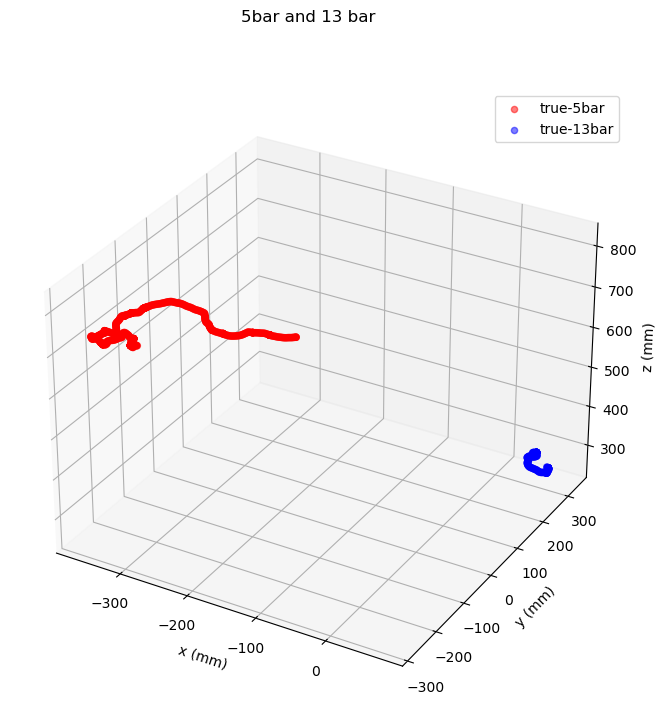

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

xt = evt_5.x
yt = evt_5.y
zt = evt_5.z
et = evt_5.energy*1000

q = ax.scatter3D(xt, yt, zt, alpha = 0.5, color = 'red', zorder = 0, label = 'true-5bar')

xt = evt_13.x
yt = evt_13.y
zt = evt_13.z
et = evt_13.energy*1000


r = ax.scatter3D(xt, yt, zt, alpha = 0.5, color = 'blue', zorder = 0, label = 'true-13bar')

plt.legend()


ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

#ax.view_init(20, 270)


# blob parts

fig.suptitle('5bar and 13 bar')

Text(0.5, 0.98, '5bar and 13 bar')

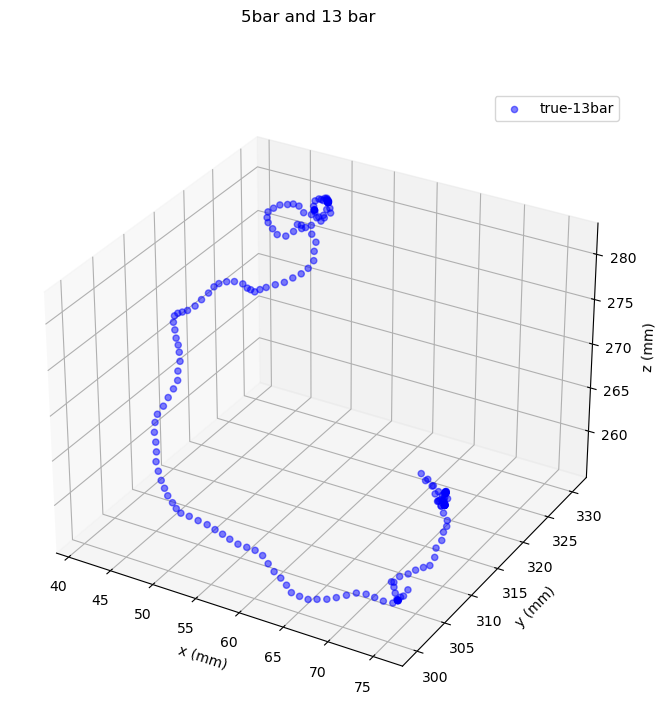

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

xt = evt_13.x
yt = evt_13.y
zt = evt_13.z
et = evt_13.energy*1000


r = ax.scatter3D(xt, yt, zt, alpha = 0.5, color = 'blue', zorder = 0, label = 'true-13bar')

plt.legend()


ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

#ax.view_init(20, 270)


# blob parts

fig.suptitle('5bar and 13 bar')

Text(0.5, 0.98, '5bar and 13 bar')

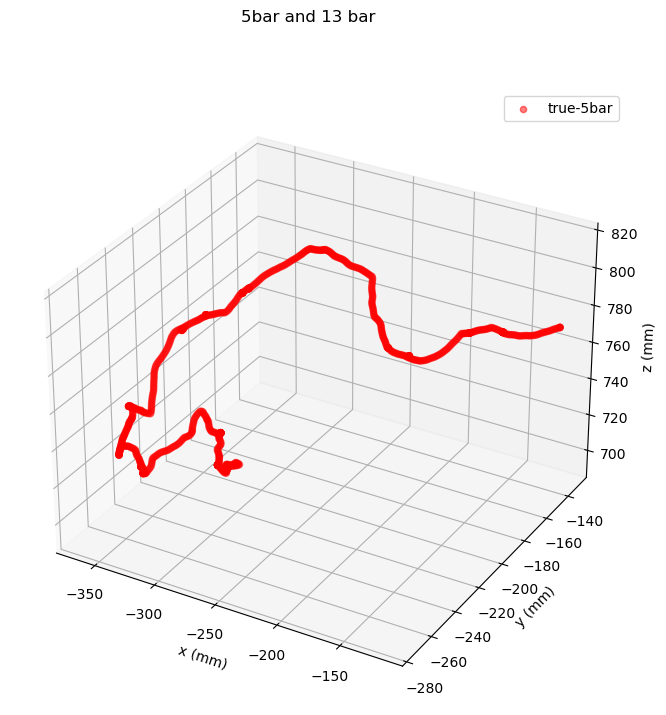

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

xt = evt_5.x
yt = evt_5.y
zt = evt_5.z
et = evt_5.energy*1000


r = ax.scatter3D(xt, yt, zt, alpha = 0.5, color = 'red', zorder = 0, label = 'true-5bar')

plt.legend()


ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

#ax.view_init(20, 270)


# blob parts

fig.suptitle('5bar and 13 bar')

### plot a BUNCH

only signal events

Text(0.5, 0.98, '5bar and 13 bar')

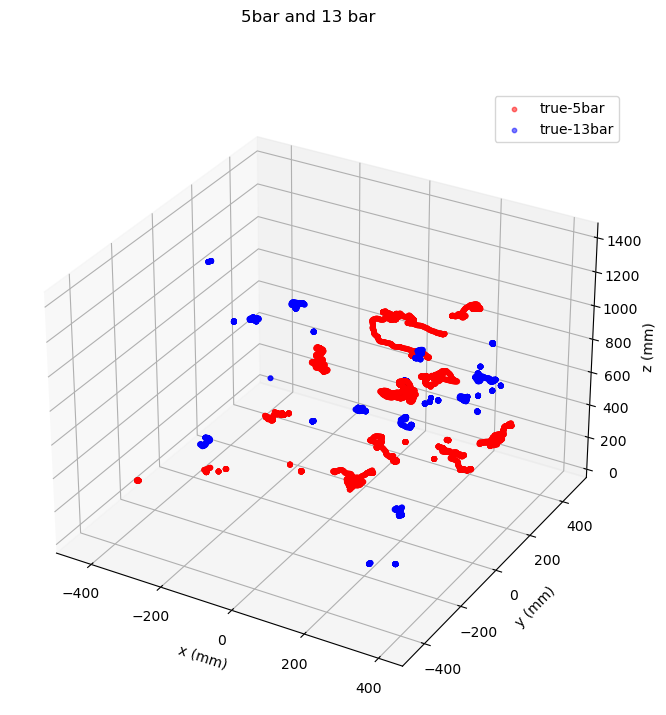

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

unique_13bar_events_sig = dfMC_13_sig.event_id.unique()

count = 10
i = 0
for evt, df_5 in dfMC_5_sig.groupby('event_id'):

    # collect a 13 bar event (we don't care which, as long as they dont repeat)
    df_13 = dfMC_13_sig[dfMC_13_sig.event_id == unique_13bar_events_sig[i]]




    xt = df_5.x
    yt = df_5.y
    zt = df_5.z
    et = df_5.energy*1000

    q = ax.scatter3D(xt, yt, zt, alpha = 0.5, color = 'red', zorder = 0, label = 'true-5bar', s = 10)

    xt = df_13.x
    yt = df_13.y
    zt = df_13.z
    et = df_13.energy*1000


    r = ax.scatter3D(xt, yt, zt, alpha = 0.5, color = 'blue', zorder = 0, label = 'true-13bar', s = 10)




    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    ax.set_zlabel('z (mm)')

    i += 1
    if i > count:
        break

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
fig.suptitle('5bar and 13 bar')

### Plot signal events with explicit reference to their particles of origin

,event_id,particle_id,hit_id,x,y,z,time,energy,label,binclass
0,1980000,23,0,75.686661,302.382935,259.099304,1.510883,0.000003,ACTIVE,1
1,1980000,22,0,75.158539,301.943390,258.388306,1.450575,0.006713,ACTIVE,1
2,1980000,22,1,74.526680,301.604431,257.733917,1.453997,0.005732,ACTIVE,1
3,1980000,22,2,73.566216,301.465271,257.725555,1.457419,0.004890,ACTIVE,1
4,1980000,22,3,72.600609,301.473267,257.820923,1.460841,0.006530,ACTIVE,1
...,...,...,...,...,...,...,...,...,...,...
204,1980000,51,0,74.385155,302.714478,257.293243,1.456164,0.000094,ACTIVE,1
205,1980000,56,0,74.385139,302.714447,257.293274,1.456182,0.000021,ACTIVE,1
206,1980000,55,0,74.385094,302.714478,257.293243,1.456186,0.000023,ACTIVE,1
207,1980000,54,0,74.385078,302.714722,257.293182,1.456185,0.000540,ACTIVE,1


/tmp/ipykernel_10272/651941748.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Text(0.5, 0.92, 'True Hits_YZ_1980000')

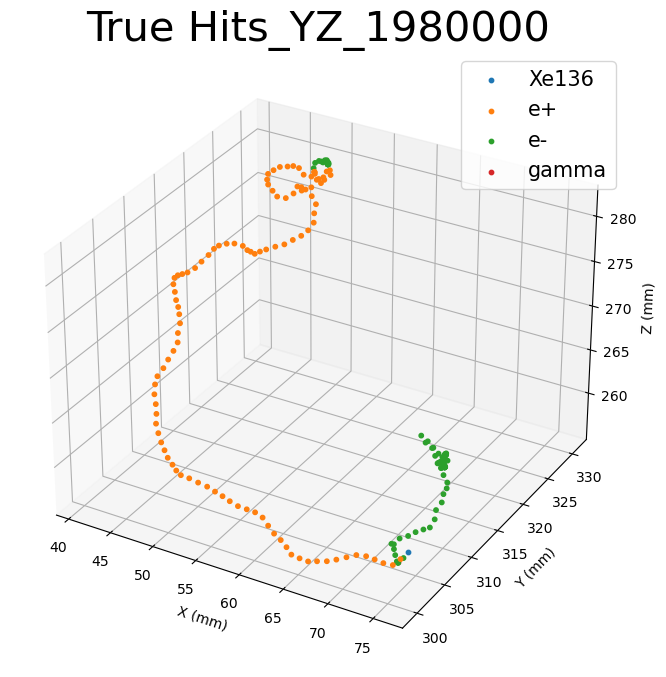

In [26]:
evt =  unique_13bar_events_sig[0]

true_part = dfP_13[dfP_13.event_id == evt]

def return_id(number):
    return str(true_part[true_part.particle_id == number].particle_name.values).strip("'[]'")

# 0th event
true = dfMC_13_sig[dfMC_13_sig.event_id == evt]
display(true)
# select event
true['particle_name'] = true['particle_id'].apply(return_id)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')


for pid, df in true.groupby('particle_name'):

    xt = df.x
    yt = df.y
    zt = df.z
    et = df.energy*1000

   
    #if (pid == 'gamma') or (pid == 'Xe131') or (pid == 'Xe129'):
    #    q = ax.scatter3D(xt, yt, zt, alpha = 1, zorder = 0, label = str(pid), s = 10)
    #else:
    r = ax.scatter3D(xt, yt, zt, alpha = 1, zorder = 0, label = str(pid), s = 10)


ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')

# Retrieve legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Create a single legend for all subplots
legend = plt.legend(handles, labels, fontsize=15)
for handle in legend.legendHandles:
    handle.set_alpha(1.0)

plt.title('True Hits_YZ_' + str(evt), fontsize=30)

In [29]:
# select an event
evts = np.unique(dfMC_5.event_id)
#print(evt[:10])

evts = np.unique(dfMC_5.event_id)
#print(evt[:10])

1980000
Tl208
e-
gamma
anti_nu_e
Pb208[3475.078]
Pb208[2614.522]
Pb208


/tmp/ipykernel_10272/3156180178.py:64: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_10272/3156180178.py:65: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)


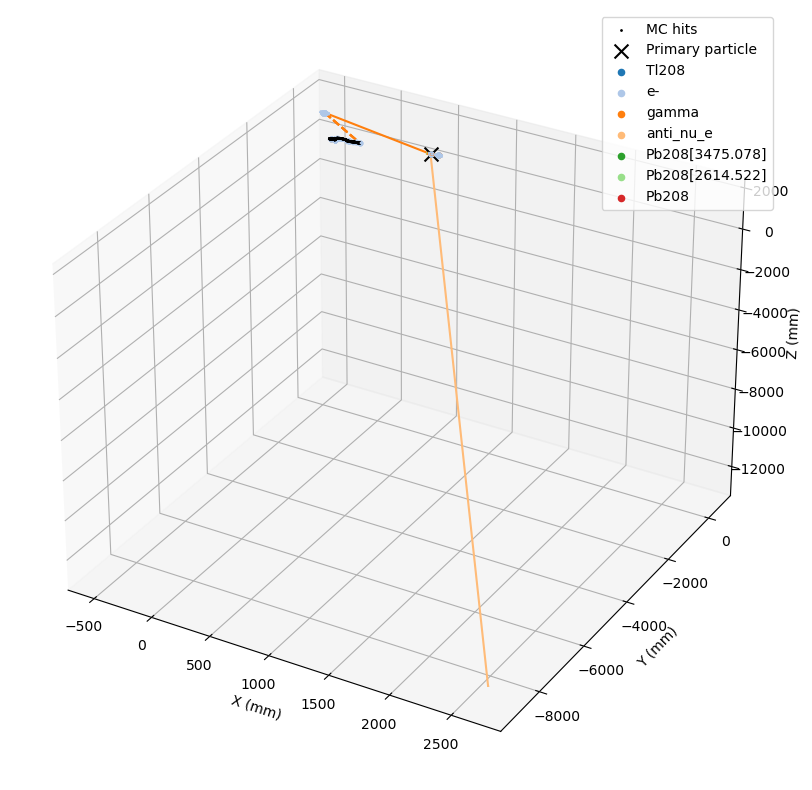

In [30]:
evt = evts[0]
print(evt)

# dashed lines and arrows showing particle direction at start and end
particle_start_end = True


# select xyz hits
hits_xyz = dfMC_5.groupby("event_id").get_group(evt)[["x", "y", "z"]].values


# select particles in event
event_particles = dfP_5.groupby("event_id").get_group(evt)
unique_particles = event_particles["particle_name"].unique()

colors = dict(zip(unique_particles, plt.cm.tab20.colors))

# get primary particle positional information and name
primary_xyz = event_particles.loc[event_particles["primary"] == True][
    ["initial_x", "initial_y", "initial_z"]
].values

primary_name = event_particles.loc[event_particles["primary"] == True][
    "particle_name"
].values[0]

primary_color = colors[primary_name]

# Scatter plot the sipm positions with the PE values
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")


ax.scatter(hits_xyz[:, 0], hits_xyz[:, 1], hits_xyz[:, 2], c='k', s=1, label="MC hits")
# get current axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
z_min, z_max = ax.get_zlim()
# Plot the primary particle
ax.scatter(
    primary_xyz[0][0],
    primary_xyz[0][1],
    primary_xyz[0][2],
    c="k",
    s=100,
    marker="x",
    label="Primary particle",
)
# Plot all the particles
# Add a legend item for each unique particle
for particle_name, color in colors.items():
    print(particle_name)
    ax.scatter([], [], c=[color], label=particle_name)

ax.legend()
event_particles_grouped = event_particles.groupby("particle_id")
for i, pid in enumerate(event_particles["particle_id"].unique()):
    length = event_particles_grouped.get_group(pid)["length"].values[0]
    init_xyz = event_particles_grouped.get_group(pid)[["initial_x", "initial_y", "initial_z"]].values[0]
    final_xyz = event_particles_grouped.get_group(pid)[["final_x", "final_y", "final_z"]].values[0]
    initial_momentum_xyz = event_particles_grouped.get_group(pid)[["initial_momentum_x", "initial_momentum_y", "initial_momentum_z"]].values[0]
    final_momentum_xyz = event_particles_grouped.get_group(pid)[["final_momentum_x", "final_momentum_y", "final_momentum_z"]].values[0]
    # normalize momenta
    initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
    final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
    pname = event_particles_grouped.get_group(pid)["particle_name"].values[0]
    # If the length is smaller than 1 mm, we make a scatter plot of the initial position.
    if length < 1.0:
        ax.scatter(init_xyz[0], init_xyz[1], init_xyz[2], color=colors[pname], s=10)
    else:
        ax.plot(
            [init_xyz[0], final_xyz[0]],
            [init_xyz[1], final_xyz[1]],
            [init_xyz[2], final_xyz[2]],
            c=colors[pname],
        )
    if particle_start_end == True:
        # set flag for ignoring electrons
        #if pname != 'e-':
        # Add small arrows to indicate the direction of the particle at the start and end
            ax.quiver(
                init_xyz[0],
                init_xyz[1],
                init_xyz[2],
                initial_momentum_xyz[0],
                initial_momentum_xyz[1],
                initial_momentum_xyz[2],
                color=colors[pname],
                length=40,
            )
            ax.quiver(
                final_xyz[0],
                final_xyz[1],
                final_xyz[2],
                final_momentum_xyz[0],
                final_momentum_xyz[1],
                final_momentum_xyz[2],
                color=colors[pname],
                length=40,
            )
            mother_id = event_particles_grouped.get_group(pid)["mother_id"].values[0]
            # plot a thin dashed line from the mother particle to the current particle
            if mother_id != 0:
                mother_xyz = event_particles_grouped.get_group(mother_id)[["final_x", "final_y", "final_z"]].values[0]
                mother_name = event_particles_grouped.get_group(mother_id)["particle_name"].values[0]
                ax.plot(
                    [mother_xyz[0], init_xyz[0]],
                    [mother_xyz[1], init_xyz[1]],
                    [mother_xyz[2], init_xyz[2]],
                    c=colors[mother_name],
                    linestyle="--",
                )
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlabel("Z (mm)")
# reset axis limits
#ax.set_xlim(x_min, x_max)
#ax.set_ylim(y_min, y_max)
#ax.set_zlim(z_min, z_max)
#ax.set_xlim((x_min, 4000))
#ax.set_ylim((200, 300))
#ax.set_zlim((800, 1500))
plt.show()


,event_id,particle_id,hit_id,x,y,z,time,energy,label,binclass
0,1980000,27,0,-119.168808,-132.885818,770.475525,2.587712,0.000082,ACTIVE,0
1,1980000,31,0,-119.168800,-132.885803,770.475464,2.587733,0.000021,ACTIVE,0
2,1980000,30,0,-119.168839,-132.885788,770.475647,2.587749,0.000035,ACTIVE,0
3,1980000,29,0,-119.168320,-132.885788,770.476196,2.587772,0.000553,ACTIVE,0
4,1980000,28,0,-119.763306,-133.685059,770.561523,2.591117,0.003606,ACTIVE,0
...,...,...,...,...,...,...,...,...,...,...
817,1980000,47,5,-148.058533,-151.424500,772.776672,2.711004,0.000424,ACTIVE,0
818,1980000,47,6,-148.051682,-151.427307,772.783936,2.711243,0.001103,ACTIVE,0
819,1980000,47,7,-148.058716,-151.430099,772.783630,2.711439,0.000482,ACTIVE,0
820,1980000,47,8,-148.054306,-151.427017,772.780090,2.711615,0.002942,ACTIVE,0


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,1980000,1,Tl208,True,0,395.535736,395.961029,531.450806,0.000000,395.535736,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,none,RadioactiveDecay
1,1980000,4,e-,False,1,395.535736,395.961029,531.450806,0.000208,399.772217,...,0.814229,-0.312714,0.831582,-0.0,-0.0,0.0,0.797973,6.654513,RadioactiveDecay,eIoni
2,1980000,5,gamma,False,4,399.745148,394.353027,535.645142,0.023834,400.166412,...,0.049446,0.014975,-0.026153,0.0,0.0,-0.0,0.057906,0.493321,eBrem,phot
3,1980000,10,e-,False,5,400.166412,394.480591,535.422363,0.025480,400.166412,...,0.004982,0.014211,0.022001,-0.0,-0.0,0.0,0.000695,0.000011,phot,eIoni
4,1980000,9,e-,False,5,400.166412,394.480591,535.422363,0.025480,400.166412,...,0.024241,0.010962,0.001743,0.0,0.0,0.0,0.000695,0.000011,phot,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1980000,84,e-,False,50,-207.681595,-168.998245,758.901672,2.944974,-207.679749,...,0.020032,-0.017028,-0.041562,0.0,-0.0,0.0,0.002361,0.025635,phot,eIoni
85,1980000,49,e-,False,28,-170.594528,-156.670044,771.238159,2.791634,-170.570908,...,-0.051604,0.079370,0.114352,-0.0,-0.0,-0.0,0.021128,0.651283,eIoni,eIoni
86,1980000,48,e-,False,28,-148.601944,-151.636505,772.931152,2.710399,-148.581802,...,-0.067523,0.096752,-0.049428,-0.0,0.0,-0.0,0.015768,0.560176,eIoni,eIoni
87,1980000,47,e-,False,28,-148.062317,-151.492874,772.731812,2.708377,-148.054413,...,0.026140,0.020785,0.121765,-0.0,0.0,0.0,0.015368,0.429064,eIoni,eIoni


In [84]:
def plot_nexus(file, 
               event, 
               toggle_arrows = True,
               toggle_mother = True, 
               xyzlims = [(0,0,0), (0,0,0)], 
               plot_only = None):
    '''
    xyzlims is [(xmin, ymin, zmin), (xmax, ymax, zmax)]
    '''
    # flags to add
    # - remove annoying electrons

    # collect relevant information (hits and particle info)
    dfMC = mcio.load_mchits_df(file).reset_index()
    dfP = mcio.load_mcparticles_dfnew(file).reset_index()
    eventsMC = np.unique(dfMC.event_id.to_numpy())

    # event of interest
    evt = eventsMC[event]

    print(f"File: {file}")
    print(f"Event: {evt}")

    # select xyz hits
    hits_xyz = dfMC.groupby("event_id").get_group(evt)[["x", "y", "z"]].values
    hits_particle_id = dfMC.groupby("event_id").get_group(evt)["particle_id"].values
    
    # select particles in event
    event_particles = dfP.groupby("event_id").get_group(evt)
    unique_particles = event_particles["particle_name"].unique()

    print(f"Unique particles: {unique_particles}")
    
    colors = dict(zip(unique_particles, plt.cm.tab20.colors))

    # get primary particle positional information and name
    primary_xyz = event_particles.loc[event_particles["primary"] == True][
        ["initial_x", "initial_y", "initial_z"]
    ].values

    primary_name = event_particles.loc[event_particles["primary"] == True][
        "particle_name"
    ].values[0]

    primary_color = colors[primary_name]

    # Scatter plot the sipm positions with the PE values
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    # Plot MC hits
    hits_colors = [colors[event_particles.loc[event_particles["particle_id"] == pid]["particle_name"].values[0]] for pid in hits_particle_id]
    ax.scatter(hits_xyz[:, 0], hits_xyz[:, 1], hits_xyz[:, 2], c=hits_colors, s=5, alpha = 1, label="MC hits", marker = "D")

    if xyzlims == 'hits':
        # get current axis limits to ensure hits are in frame
        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        z_min, z_max = ax.get_zlim()
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_zlim(z_min, z_max)
        
    # Plot the primary particle
    ax.scatter(
        primary_xyz[0][0],
        primary_xyz[0][1],
        primary_xyz[0][2],
        c="k",
        s=100,
        marker="x",
        label="Primary particle",
    )

    if xyzlims == 'primary':
        # get current axis limits to ensure primary particle is in frame
        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        z_min, z_max = ax.get_zlim()
    

    # Plot all the particles
    # Add a legend item for each unique particle
    for particle_name, color in colors.items():
        ax.scatter([], [], c=[color], label=particle_name)

    legend1 = ax.legend(loc = "upper left")

    event_particles_grouped = event_particles.groupby("particle_id")
    for i, pid in enumerate(event_particles["particle_id"].unique()):
        length = event_particles_grouped.get_group(pid)["length"].values[0]
        init_xyz = event_particles_grouped.get_group(pid)[["initial_x", "initial_y", "initial_z"]].values[0]
        final_xyz = event_particles_grouped.get_group(pid)[["final_x", "final_y", "final_z"]].values[0]
        initial_momentum_xyz = event_particles_grouped.get_group(pid)[["initial_momentum_x", "initial_momentum_y", "initial_momentum_z"]].values[0]
        final_momentum_xyz = event_particles_grouped.get_group(pid)[["final_momentum_x", "final_momentum_y", "final_momentum_z"]].values[0]
        # normalize momenta
        initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
        final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
        pname = event_particles_grouped.get_group(pid)["particle_name"].values[0]

        # check if you want to plot the particle
        if plot_only != None:
            if pname not in plot_only:
                continue
            
        # If the length is smaller than 1 mm, we make a scatter plot of the initial position.
        if length < 1.0:
            ax.scatter(init_xyz[0], init_xyz[1], init_xyz[2], color=colors[pname], s=10)
        else:
            ax.plot(
                [init_xyz[0], final_xyz[0]],
                [init_xyz[1], final_xyz[1]],
                [init_xyz[2], final_xyz[2]],
                c=colors[pname],
            )


        # plot a thin dashed line from the mother particle to the current particle
        if toggle_mother == True:
            mother_id = event_particles_grouped.get_group(pid)["mother_id"].values[0]
            if mother_id != 0:
                mother_xyz = event_particles_grouped.get_group(mother_id)[["final_x", "final_y", "final_z"]].values[0]
                mother_name = event_particles_grouped.get_group(mother_id)["particle_name"].values[0]
                ax.plot(
                    [mother_xyz[0], init_xyz[0]],
                    [mother_xyz[1], init_xyz[1]],
                    [mother_xyz[2], init_xyz[2]],
                    c=colors[mother_name],
                    linestyle="--",    
                )

        if toggle_arrows == True:
            # Add small arrows to indicate the direction of the particle at the start and end
            ax.quiver(
                init_xyz[0],
                init_xyz[1],
                init_xyz[2],
                initial_momentum_xyz[0],
                initial_momentum_xyz[1],
                initial_momentum_xyz[2],
                color=colors[pname],
                length=40,
            )
            ax.quiver(
                final_xyz[0],
                final_xyz[1],
                final_xyz[2],
                final_momentum_xyz[0],
                final_momentum_xyz[1],
                final_momentum_xyz[2],
                color=colors[pname],
                length=40,
            )

    ax.set_xlabel("X (mm)")
    ax.set_ylabel("Y (mm)")
    ax.set_zlabel("Z (mm)")
    if xyzlims[0] == 'self-set':
        ax.set_xlim(xyzlims[1][0], xyzlims[2][0])
        ax.set_ylim(xyzlims[1][1], xyzlims[2][1])
        ax.set_zlim(xyzlims[1][2], xyzlims[2][2])
    

    # Add custom legend entries for the second legend
    arrow_line = Line2D([0], [0], color="blue", linestyle="-", marker=">", markersize=10)
    line = Line2D([0], [0], color="black", linestyle="--", lw=2)
    straight_line = Line2D([0], [0], color = "red")

    # Add the custom legend
    legend2 = ax.legend(
        [arrow_line, line, straight_line],  # Custom handles
        ["direction of travel", "mother to daughter", "initial to final"],  # Labels
        loc="lower right"  # Position
    )

    # Add both legends to the plot
    ax.add_artist(legend1)
    ax.add_artist(legend2)


    plt.show()


File: nexus_5bar_208Tl.h5
Event: 1980001
Unique particles: ['Tl208' 'e-' 'gamma' 'anti_nu_e' 'Pb208[3197.711]' 'Pb208[2614.522]'
 'Xe136' 'e+' 'Pb208']


/tmp/ipykernel_10272/286987708.py:97: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_10272/286987708.py:98: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)


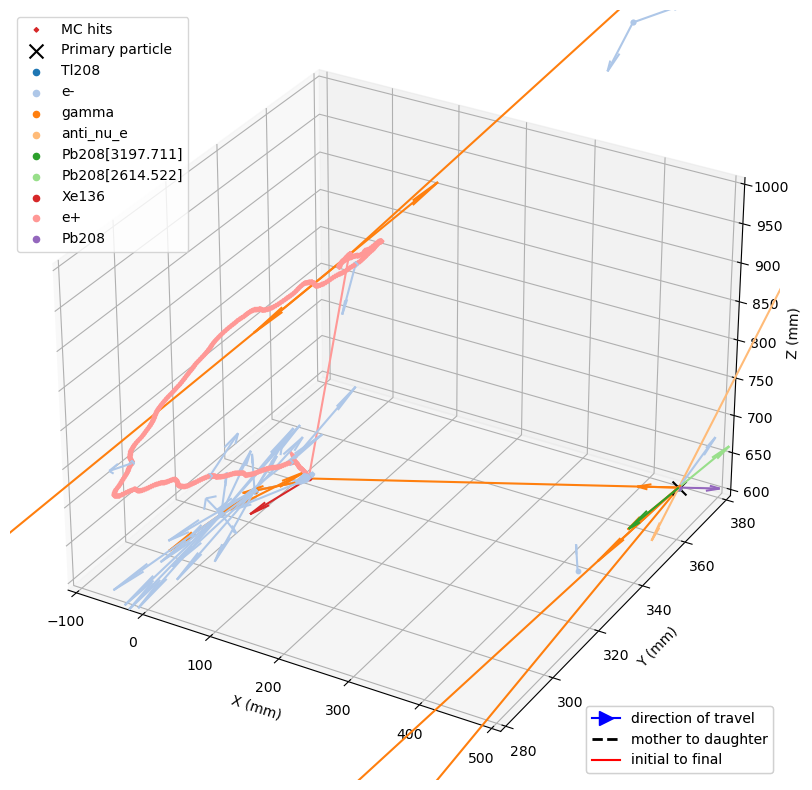

In [85]:
plot_nexus(path_5, 1, xyzlims = ['self-set', (-100, 280, 600), (500, 380, 1000)], toggle_mother = False)#, plot_only = ['e+', 'e-', 'Xe136'])

File: nexus_5bar_208Tl.h5
Event: 1980002
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3708.451]' 'gamma' 'Pb208[3197.711]'
 'Pb208[2614.522]' 'Pb208']


/tmp/ipykernel_10272/286987708.py:97: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_10272/286987708.py:98: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)


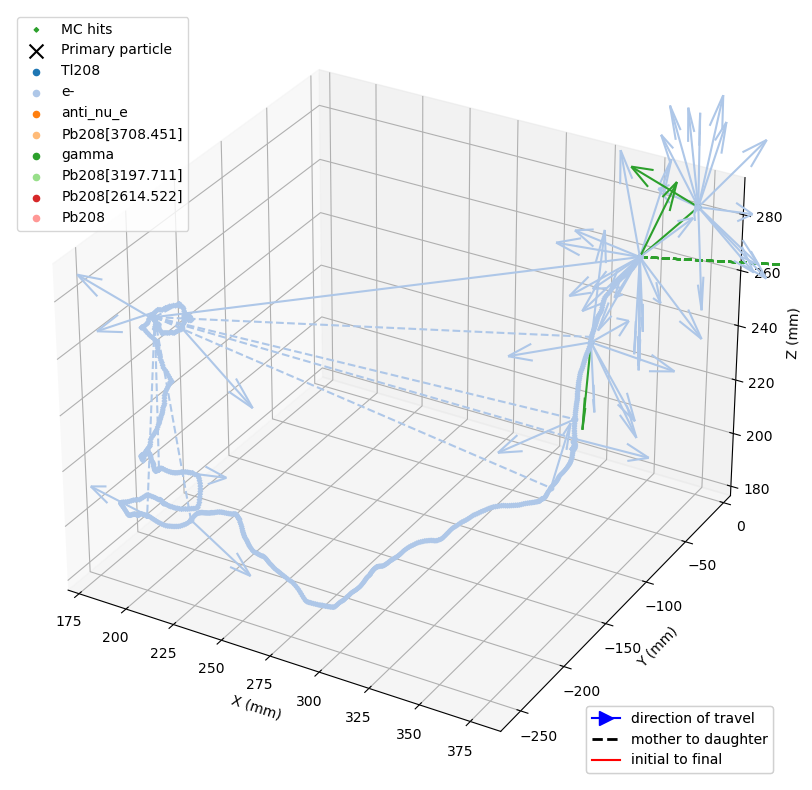

In [86]:
plot_nexus(path_5, 2,  xyzlims = 'hits')#, xyzlims = [(-100, 280, 600), (500, 380, 1000)])#, plot_only = ['e+', 'e-', 'Xe136'])

### lets try and plot both 5 bar and 13 bar at once

File: nexus_13.5bar_208Tl.h5
Event: 1980000
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe136' 'e+' 'Pb208']


/tmp/ipykernel_10272/286987708.py:97: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_10272/286987708.py:98: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)


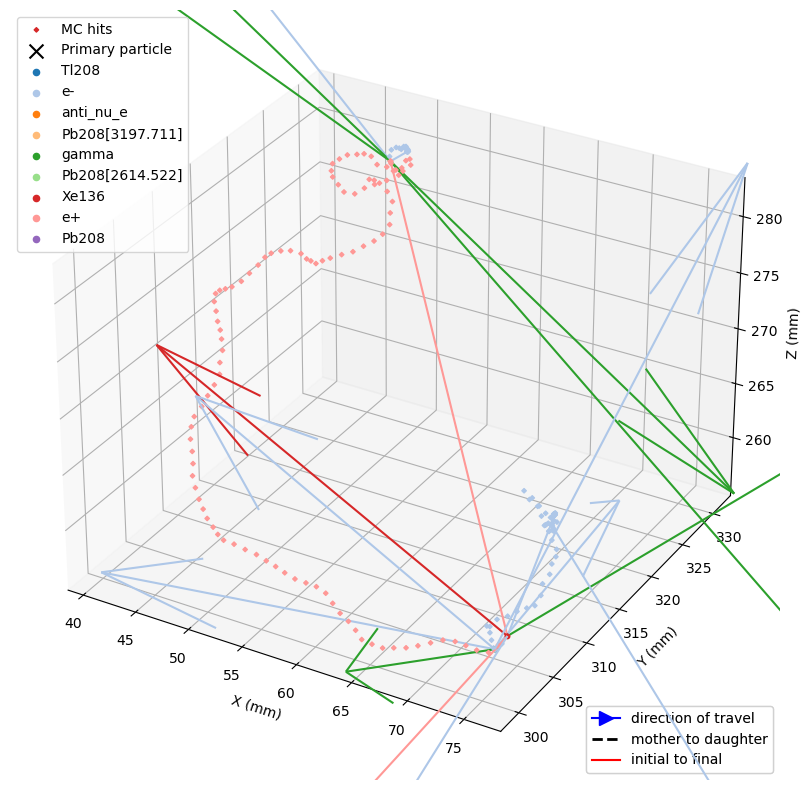

In [88]:
plot_nexus(path_13, 0, xyzlims = 'hits', toggle_arrows = True, toggle_mother = False)
#plot_nexus(path_5, 2)
